In [1]:
#pip install --upgrade scikit-learn

In [2]:
#pip install --upgrade certifi

In [3]:
#import ssl

# Ignore SSL certificate errors
#ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
#from sklearn.datasets import fetch_openml

In [5]:
#mnist = fetch_openml("mnist_784")

In [6]:
#mnist

In [7]:
#X , Y = mnist['data'], mnist['target']
x = mnist.data
y = mnist.target

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
%matplotlib inline

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [45]:
import numpy as np

some_digit = x.iloc[60000]
some_digit_array = np.array(some_digit)  # Convert the Series to a NumPy array
some_digit_image = some_digit_array.reshape(28, 28)  # Reshape the NumPy array

(-0.5, 27.5, 27.5, -0.5)

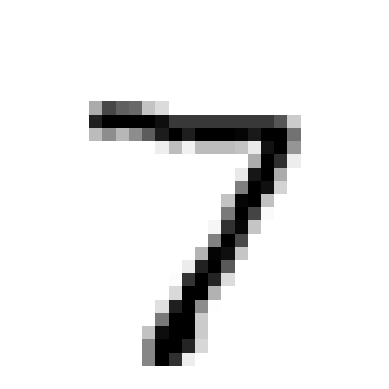

In [46]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [47]:
y[36000]

'9'

In [48]:
x_train, x_test = x[:60000], x[60000:]

In [49]:
y_train, y_test = y[:60000], y[60000:]

In [50]:
#import numpy as np
#import pandas as pd
#shuffle_index = np.random.permutation(60000)
#x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [51]:
import numpy as np
import pandas as pd

# Assuming you have loaded your training data into x_train and y_train as Pandas DataFrames
# For example:
# x_train = pd.DataFrame(...)
# y_train = pd.DataFrame(...)

# Convert Pandas DataFrames to NumPy arrays
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [52]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [53]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(tol = 0.1)

In [56]:
clf.fit(x_train, y_train_2)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(tol=0.1)

In [57]:
clf.predict([some_digit])

array([False])

In [58]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [59]:
a.mean()

0.9786833333333332